# <center> Métodos Computacionales 2
# <center> Tarea 1

### Manuel Francisco Martinez Motta - 202012622
### Manuela Isabella Nobile Russi - 202012868

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

## Punto 1

Tenemos que para $f(x)=x^2$

<center> $\frac{d}{dx}x^2 = f'(x)$

<center> $\frac{d}{dx}x^2 = \lim_{h \to 0} \frac{-(x + 2h)^{2} + 4(x + h)^{2} - 3x^{2}}{2h}$

<center> $2x = \lim_{h \to 0} \frac{-(x + 2h)^{2} + 4(x + h)^{2} - 3x^{2}}{2h}$

<center> $2x = \lim_{h \to 0} \frac{-x^{2} - 4xh - 4h^{2} + 4x^{2} + 8xh + h^{2} - 3x^{2}}{2h}$

<center> $2x = \lim_{h \to 0} \frac{4xh - 3h^{2}}{2h} = \lim_{h \to 0} 2x + \frac{3}{2}h$

Luego 

$2x = 2x $
 

Del mismo modo para la función sin(x):

<center> $\frac{d}{dx}sin(x) = f'(x)$

<center> $\frac{d}{dx}sin(x) = \lim_{h \to 0} \frac{-(x + 2h)^{2} + 4(x + h)^{2} - 3x^{2}}{2h}$

<center> $\cos(x) = \lim_{h \to 0} \frac{-(x + 2h)^{2} + 4(x + h)^{2} - 3x^{2}}{2h}$

<center> $\cos(x) = \lim_{h \to 0} \frac{-\sin(x)\cos(2h) - \cos(x)\sin(2h) + 4\sin(x)\cos(h) + 4\cos(x)\sin(h) - 3\sin(x)}{2h}$

<center> $\cos(x) = \lim_{h \to 0} \frac{\sin(x) \cdot (4\cos(h) - \cos(2h) - 3)}{2h} + \lim_{h \to 0} \frac{- \cos(x)\sin(2h) + 4\cos(x)\sin(h)}{2h}$

<center> $\cos(x) = \lim_{h \to 0} \frac{\sin(x) \cdot (4\cos(h) - \cos(2h) - 3)}{2h} = \lim_{h \to 0} \frac{\sin(x) \cdot (-4\sin(h) + 2\sin(2h))}{2} = 0$

<center> $\cos(x) = \lim_{h \to 0} -\frac{\cos(x)\sin(2h)}{2h} + \lim_{h \to 0}\frac{4\cos(x)\sin(h)}{2h} = 2\cos(x) - \cos(x) = \cos(x)$

Luego,

$\cos(x) = \cos(x)$

Por lo cual el primer operador es consistente para ambas funciones

Ahora, de la misma forma para el segundo operador tenemos que para f(x)=x^2

<center> $f''(x) = \lim_{h \to 0} \frac{(x + h)^{2} - 2x^{2} + (x - h)^{2}}{h^{2}}$

<center> $2 = \lim_{h \to 0} \frac{x^{2} + 2xh + h^{2} - 2x^{2} + x^{2} - 2xh + h^{2}}{h^{2}} = \lim_{h \to 0} \frac{2h^{2}}{h^{2}}$

<center> $ 2 = 2 $

Y para f(x) = sen(x) tenemos que 

<center> $f''(x) = \lim_{h \to 0} \frac{\sin(x + h) - 2\sin(x) + \sin(x - h)}{h^{2}}$

<center> $-\sin(x) = \lim_{h \to 0} \frac{\sin(x)\cos(h) + \cos(x)\sin(h) - 2\sin(x) + \sin(x)\cos(h) - \cos(x)\sin(h)}{h^{2}}$

<center> $-\sin(x) = \lim_{h \to 0} \frac{2\sin(x)\cos(h) - 2\sin(x)}{h^{2}} = \lim_{h \to 0} \frac{2\sin(x) \cdot (\cos(h) - 1)}{h^{2}}$

<center> $-\sin(x) = \lim_{h \to 0} \frac{2\sin(x) \cdot (\cos(h) - 1)}{h^{2}} = \lim_{h \to 0} \frac{2\sin(x) \cdot (-\sin(h))}{2h} = -\sin(x)$

Por lo cual:

$-\sin(x) = -\sin(x)$

Lo que muestra que este operador también es consistente.

## Punto 2

In [2]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0] #Paso del tiempo en la particula.
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        self.pE = 0
        
        self.p = self.m*self.v #Momentum
        
        self.f = self.m*self.a #Fuerza
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
    
        # Fisica
        self.K = 20.
        
        self.VEk = np.zeros(len(t))
        self.VEp = np.zeros(len(t))
        
    def Evolution(self,i): #Movimiento de la particula.
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetPotentialEnergy(i)
        
        self.a = self.f/self.m
        
        # Euler
        self.r += self.dt*self.v
        self.v += self.dt*self.a
        
        # Euler-Cromer
  #      self.v += self.dt*self.a
  #      self.r += self.dt*self.v
        
        
    def CalculateForce(self,p): # ??
        
        d = np.linalg.norm(self.r - p.r)
        
        compresion = self.radius + p.radius - d
        
        if compresion >= 0:
            
            Fn = self.K * compresion**3
            
            self.n = (self.r - p.r)/d
            
            # Falta implementar 
            
            self.f = np.add(self.f,Fn*self.n)
                        
            # Aca debes agregar la energía potencial
            self.pE += (self.K/4)*(compresion**4)
        
    # Setter -> Cambia el valor del atributo en la clase determinada.
    def SetPosition(self,i): # --> Cambia posición
        self.R[i] = self.r
    
    def SetVelocity(self,i): # --> Cambia velocidad
        self.V[i] = self.v #Velocidad
        self.P[i] = self.m*self.v #Momentum
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v) #Energia cinetica

    def SetPotentialEnergy(self,i):
        self.VEp[i] = self.pE
    
    # Getter -> Da acceso al atributo en la clase determinada.
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotencialEnergy(self,scale=1):
        return self.VEp[::scale] 
    
    def CheckWallLimits(self,limits,e,dim):
       
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = -e*self.v[i]
                self.r[i] = limits[i] - self.radius
                
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = -e*self.v[i]
                self.r[i] = -limits[i] + self.radius
    

In [3]:
#"""

def GetParticles(N, t):
    particles = []

    # Agregar N partículas utilizando el método de Monte Carlo
    for _ in range(N):
        # Generar posición aleatoria
        new_position = np.array([np.random.uniform(-10, 10), np.random.uniform(-10, 10)])

        # Verificar que no haya superposiciones con otras partículas existentes
        while any(np.linalg.norm(new_position - p.r) < p.radius * 2 for p in particles):
            new_position = np.array([np.random.uniform(-10, 10), np.random.uniform(-10, 10)])

        # Generar velocidad aleatoria
        new_velocity = np.array([np.random.uniform(-5, 5), np.random.uniform(-5, 5)])

        # Resto de parámetros fijos para la nueva partícula
        new_acceleration = np.array([0., 0.])
        new_mass = 1
        new_radius = 2
        new_id = 1

        # Crear la nueva partícula y agregarla a la lista
        particles.append(Particle(new_position, new_velocity, new_acceleration, t, m=new_mass, radius=new_radius, Id=new_id))

    return particles

#"""

In [4]:
dt = 0.001 #Paso del tiempo (cada 0.001 segundos).
tmax = 10 #Tiempo maximo de 10 segundo.
t = np.arange(0,tmax,dt) #Determina el paso del tiempo en el rango 0 a 1 segundo con paso de 0.001 segundos.
Particles = GetParticles(10,t) #Genera las particulas

In [5]:
def RunSimulation(t,Particles): #Genera la simulación.
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [6]:
Particles = RunSimulation(t,Particles) #Corre la simulación

Running simulation: 100%|██████████████████████████████████████████████████| 10000/10000 [00:06<00:00, 1639.56 Steps/s]


In [7]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]

<IPython.core.display.Javascript object>


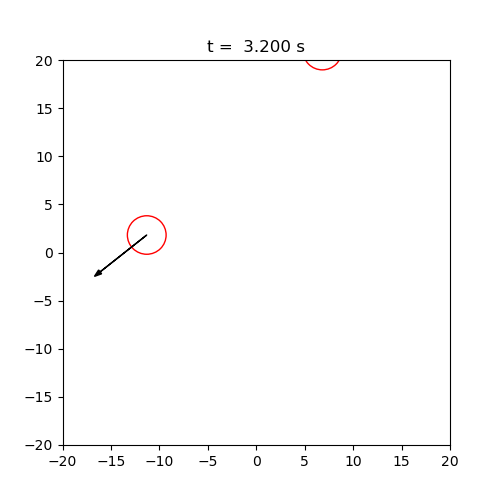

In [9]:
#Generar la animación.

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
#ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    #KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        #KE += p.GetKineticEnergy(scale)[i]
        
        #ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        #ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [10]:
MomentumT = Particles[0].GetMomentum(scale)
KineticT = Particles[0].GetKineticEnergy(scale)
PotentialT = Particles[0].GetPotencialEnergy(scale)
AngularT = np.cross(Particles[0].GetPosition(scale), Particles[0].GetMomentum(scale))

In [11]:
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))
    KineticT = np.add(KineticT,Particles[i].GetKineticEnergy(scale))
    PotentialT = np.add(PotentialT,Particles[i].GetPotencialEnergy(scale))
    AngularT = np.add(AngularT, np.cross(Particles[i].GetPosition(scale), Particles[i].GetMomentum(scale)))

<IPython.core.display.Javascript object>


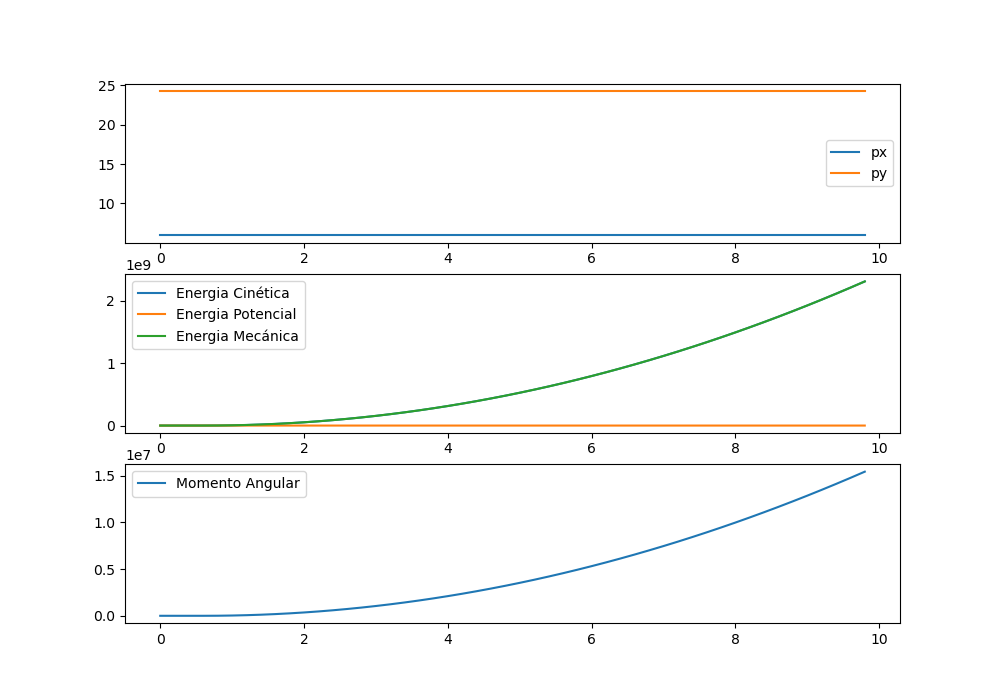

In [12]:
fig3 = plt.figure(figsize=(10,7))
ax3 = fig3.add_subplot(311)
ax3.plot(t1,MomentumT[:,0],label='px')
ax3.plot(t1,MomentumT[:,1],label='py')
ax3.legend()
ax4 = fig3.add_subplot(312)
ax4.plot(t1,KineticT,label='Energia Cinética')
ax4.plot(t1,PotentialT,label='Energia Potencial')
ax4.plot(t1, KineticT + PotentialT,label='Energia Mecánica')
ax4.legend()
ax5 = fig3.add_subplot(313)
ax5.plot(t1,AngularT,label='Momento Angular')
ax5.legend()


Dado que nos encontramos en una simulación con fuerzas externas y los choques entre particulas son elásticos, el momento se debe conversar como se ve en la figura anterior, tanto el momento en X como el momento en Y se mantienen constantes a lo largo de todo el tiempo de simulación.

## Punto 3

c = 3x10$^8$ m/s 

1au = 1.496x10$^{11}$ m 

1año = 3.154x10$^7$ s 

In [14]:
c = 3e8 
au = 1.496e11
año = 3.154e7

In [16]:
c_au_año = c*año/au
print("La velocidad de la luz en unidades astronómicas por año es: " + str(c_au_año) + " au/año")

La velocidad de la luz en unidades astronómicas por año es: 63248.66310160428 au/año


## Punto 4

In [31]:
class Planeta:
    
    def __init__(self, e, a, t):
        
        self.t = t
        self.dt = t[1] - t[0] # Paso del tiempo
        
        self.e = e # Excentricidad
        self.a_ = a # Semi-eje mayor
        
        self.G = 4*np.pi**2 # Unidades gaussianas
        
        self.r = np.zeros(3)
        self.v = np.zeros_like(self.r)
        self.a = np.zeros_like(self.r)
        
        self.r[0] = self.a_*(1-self.e)
        self.v[1] = np.sqrt( self.G*(1+self.e)/(self.a_*(1.-self.e)) )
        
        self.R = np.zeros((len(t),len(self.r)))
        self.V = np.zeros_like(self.R)
        
        # El valor del pasado
        self.rp = self.r
        
    def GetAceleration(self):
        
        d = np.linalg.norm(self.r)
        self.a = -self.G/d**3*self.r
        
        
    def Evolution(self,i):
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.GetAceleration()
        
        if i==0:
            self.r = self.rp + self.v*self.dt
        else:
            
            # rp pasado, r presente rf futuro
            self.rf = 2*self.r - self.rp + self.a*self.dt**2
            self.v = (self.rf - self.rp)/(2*self.dt)
            
            self.rp = self.r
            self.r = self.rf
    
    #Setter
    def SetPosition(self,i):
        self.R[i] = self.r
        
    def SetVelocity(self,i):
        self.V[i] = self.v
    
    #Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
    
    def GetPerihelio(self):
        Dist = np.linalg.norm(self.R,axis=1)
        timeup = []
        for i in range(1,len(Dist)-1):
            if Dist[i] < Dist[i-1] and Dist[i] < Dist[i+1]:
                timeup.append(self.t[i])
        return timeup

### Parte a)

In [32]:
def GetPlanetas(t):
    
    #Nombre_Planeta = Planeta(excentricidad,distancia al sol,t)
    Mercurio = Planeta(0.2056,0.387,t)
    Venus = Planeta(0.0067,0.7233,t)
    Tierra = Planeta(0.01671,1.,t)
    Marte = Planeta(0.0935,1.5233,t)
    Jupiter = Planeta(0.048775,5.19,t)
    
    return [Mercurio,Venus,Tierra,Marte,Jupiter]

In [33]:
dt = 0.001 #centesima de año terrestre
tmax = 30 #Año terrestre
t = np.arange(0.,tmax,dt)
Planetas = GetPlanetas(t)

In [34]:
len(Planetas)

5

In [35]:
def RunSimulation(t,Planetas):
    
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        #print(it)
        for i in range(len(Planetas)):
            Planetas[i].Evolution(it)
            # Aca debes agregar la interaccion con la pared
            
            
    return Planetas

In [36]:
Planetas = RunSimulation(t,Planetas)

Running simulation: 100%|█████████████████████████████████████████████████| 30000/30000 [00:02<00:00, 14855.54 Steps/s]


In [37]:
#Calculando periodo con Perihelio.

def perihelios():
    i = 0
    Perihelios = []
    #for i in range(len(Planetas)-1):
    #    Per = Planetas[i].GetPerihelio()
    #    Perihelios.append((round(Per[0],2)))
    #    print(i)
    while i <= (len(Planetas)-1):
        Per = Planetas[i].GetPerihelio() #Perihelio del planeta
        Perihelios.append((round(Per[0],2)))
        i += 1
    
    return Perihelios

Periodo = perihelios()

### Parte b

In [38]:
planetas_ = ["Mercurio","Venus","Tierra","Marte","Júpiter"]
for i in range(len(planetas_)):
    print("El período de %s  es de %s años"%(planetas_[i],Periodo[i]))

El período de Mercurio  es de 0.24 años
El período de Venus  es de 0.55 años
El período de Tierra  es de 0.97 años
El período de Marte  es de 1.88 años
El período de Júpiter  es de 11.81 años


### Parte c

<IPython.core.display.Javascript object>


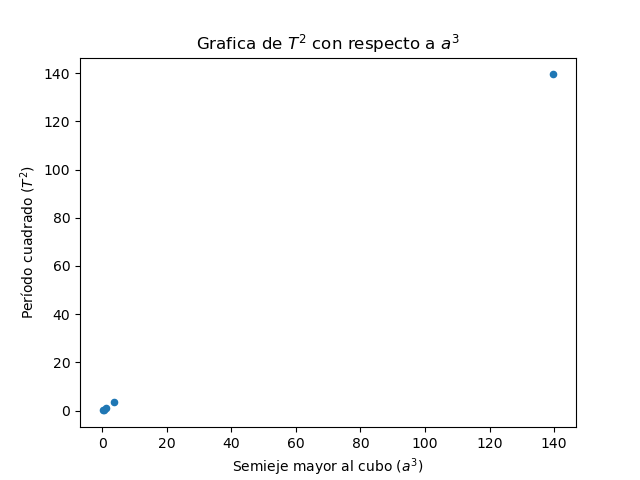

In [42]:
T_2 = np.zeros(len(planetas_))
a_3 = np.zeros(len(planetas_))
for i in range(len(planetas_)):
    T_2[i] = Periodo[i]**2
    a_3[i] = Planetas[i].a_**3

plt.figure()
plt.title(r"Grafica de $T^2$ con respecto a $a^3$")  
plt.ylabel(r"Período cuadrado ($T^2$)")
plt.xlabel(r"Semieje mayor al cubo ($a^3$)")
plt.scatter(a_3,T_2,s=20)

### Parte d

In [52]:
def GetRegression(x,y):
    mean_y = np.mean(y)
    mean_x = np.mean(x)
    p = np.sum((x-mean_x)*(y-mean_y))
    q = np.sum((x-mean_x)**2)
    m = p/q
    b = mean_y - m*mean_x
    return m,b

m,b = np.polyfit(cbd_a,sqrd_T,1)
print("Pendiente de: %s \nPunto de corte: %s"%(m,b))

NameError: name 'm' is not defined

### Parte e

In [44]:
masa_solar_gauss = 1/m
masa_solar_ui = masa_solar_gauss*(1.989e30)
print("Masa solar en unidades gausianas: %s \nMasa solar en unidades internacionales: %s kg."%(masa_solar_gauss,masa_solar_ui))


NameError: name 'm' is not defined

## Punto 5

Tenemos con el método de Euler que

$u_{i+1} = u_{i} + \Delta t (\alpha u_{i})$

Que sí cambiamos los indices queda que

$u_{i} = (1 + \alpha \Delta t) \cdot u_{i-1}.$

Si utilizamos  el hecho de que  $u_{i-1} = (1 + \alpha \Delta t) \cdot u_{i-2}.$ nos da que:

$u_{i} = (1 + \alpha\Delta t)^2 \cdot u_{i-2}$

De esta forma podemos iterar el indice i, k veces lo que da como resultado que

$u_k = (1 + \alpha\Delta t)^k \cdot u_0.$

Siendo $u_0$ el valor inicial

Para el caso en que $\alpha < 0$. Tenemos que:

$ 1 + \alpha \Delta t > 0 $

Luego

$ \Delta t > -1/\alpha $

In [49]:
x = np.linspace(0,10,50)
funcion = lambda x: np.exp(-x)

def Euler(k,u0,step):
    t = np.arange(0,k)
    u = np.zeros(k)
    ui = u0
    for i in range(0,k):
        u[i] = ui*(1-step)**i
        ui = u[i]
    return t,u
        
a = Euler(10,1,1.1)
b = Euler(10,1,1.5)
c = Euler(10,1,1.9)

<IPython.core.display.Javascript object>


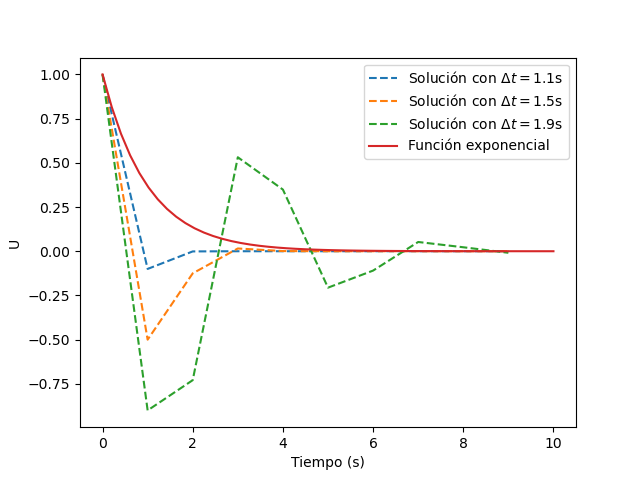

Text(0, 0.5, 'U')

In [50]:
plt.figure()
plt.plot(a[0],a[1],label="Solución con $\Delta t =1.1$s",linestyle="dashed")
plt.plot(b[0],b[1],label="Solución con $\Delta t =1.5$s",linestyle="dashed")
plt.plot(c[0],c[1],label="Solución con $\Delta t =1.9$s",linestyle="dashed")
plt.plot(x,funcion(x),label="Función exponencial")

leg = plt.legend(loc='upper right')

plt.xlabel("Tiempo (s)")
plt.ylabel("U")